In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.shape

(10000, 6)

In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.duplicated().any()

True

In [8]:
data.describe(include= object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


### Univariate Analysis and Visualizations

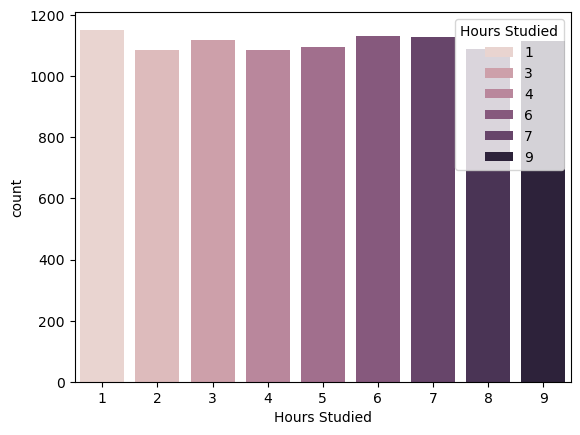

In [9]:
import seaborn as sns
sns.countplot(x ='Hours Studied', data = data, hue = 'Hours Studied' )
plt.show()

In [10]:
data['Hours Studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

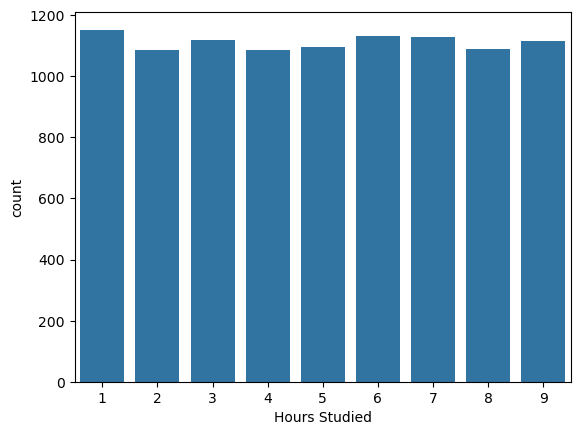

In [11]:
sns.countplot(x ='Hours Studied', data = data)
plt.show()

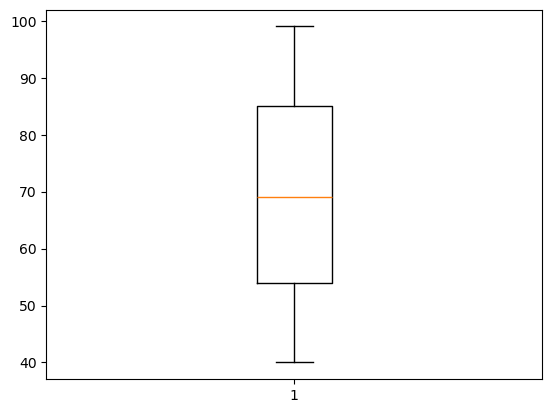

In [12]:
plt.boxplot(x = data['Previous Scores'])
plt.show()

In [13]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

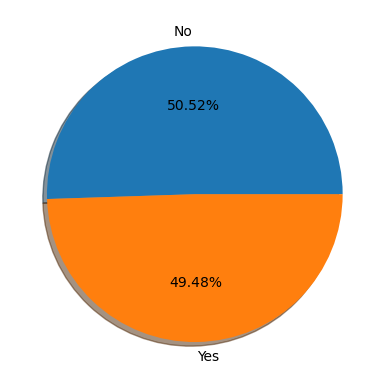

In [14]:
plt.pie(data['Extracurricular Activities'].value_counts(), 
    labels= data['Extracurricular Activities'].value_counts().index, 
        shadow = True, autopct= "%1.2f%%")
plt.show()

In [15]:
data['Sleep Hours'].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

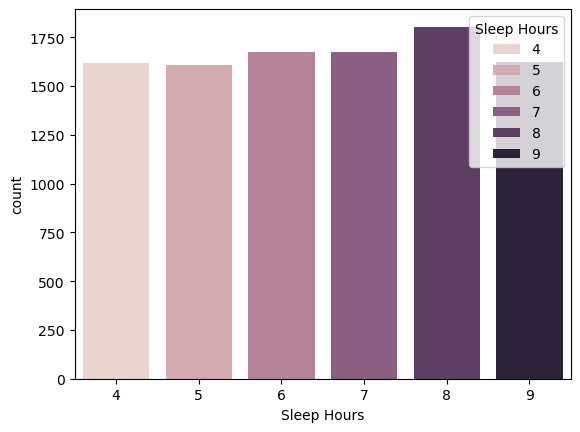

In [16]:
sns.countplot(x = 'Sleep Hours', data = data, hue = 'Sleep Hours')
plt.show()

In [17]:
data['Sample Question Papers Practiced'].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

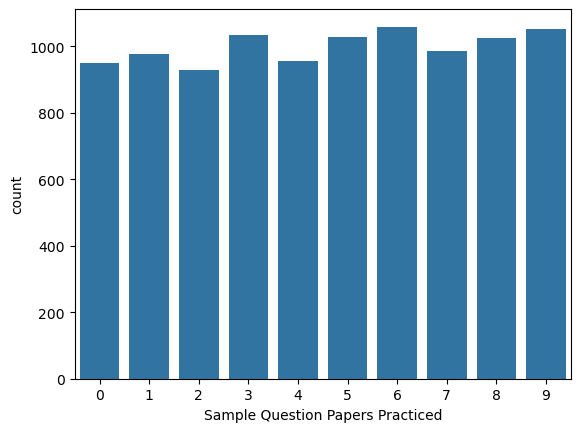

In [18]:
sns.countplot(x = 'Sample Question Papers Practiced', data = data )
plt.show()

### Bivariate Analysis & Visualizations

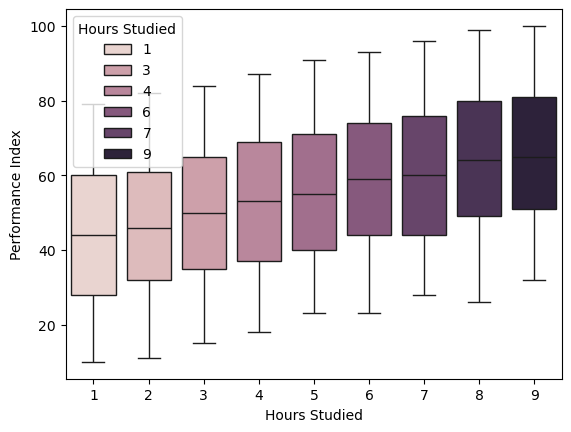

In [19]:
sns.boxplot(x ="Hours Studied", y = 'Performance Index', data = data,hue = 'Hours Studied') #'Performance Index']) #, y = data['Performance Index'])
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


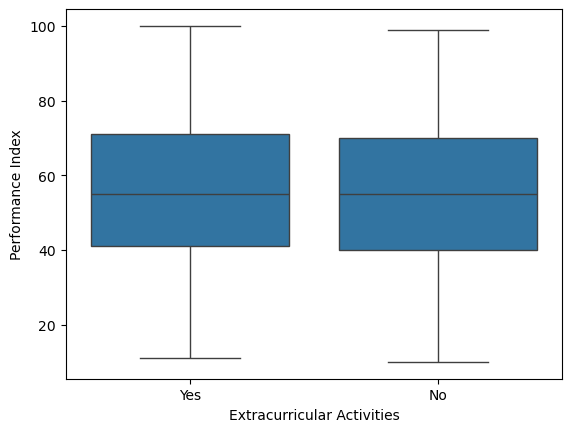

In [21]:
sns.boxplot(x = 'Extracurricular Activities', y = 'Performance Index', data = data)
plt.show()

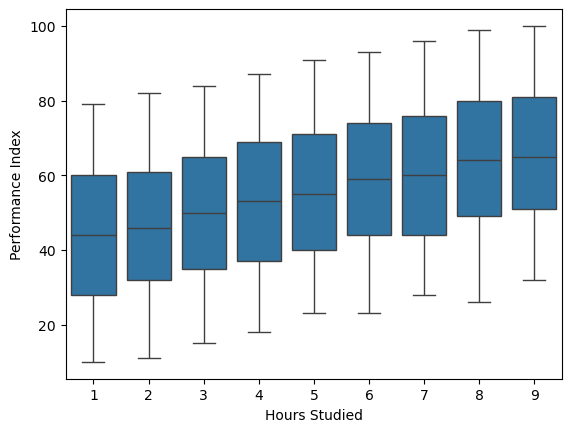

In [22]:
sns.boxplot(x = 'Hours Studied', y = 'Performance Index', data = data )
plt.show()

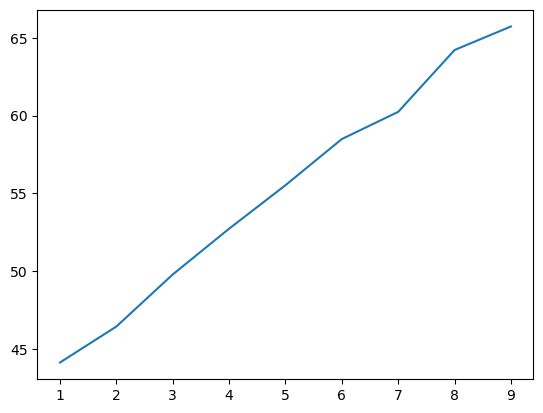

In [23]:
avg_performance_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_hours.index, avg_performance_hours.values)
plt.show()

#### Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [25]:
encoder = LabelEncoder()
data['Extracurricular Activities'] = encoder.fit_transform(data['Extracurricular Activities'])

In [26]:
data.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4516,2,94,1,9,1,72.0
4966,7,43,1,8,6,38.0
2961,8,88,0,8,2,80.0


In [27]:
Train = data.drop(columns= 'Performance Index')
Target = data['Performance Index']

In [28]:
Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2301,5,91,0,9,4
3949,4,62,0,6,7
4135,2,95,1,7,5


In [29]:
Target.sample(3)


8321    48.0
9279    64.0
3517    39.0
Name: Performance Index, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.3)

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 5) (3000, 5) (7000,) (3000,)


### Modeling

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

### Evaluating Model

In [34]:
model.score(X_train, y_train)

0.9888085928849947

In [35]:
predict = np.round(model.predict(X_test), decimals = 1)

In [36]:
pd.DataFrame({"Actual Performance": y_test, "Predicted Performance": predict})

,Actual Performance,Predicted Performance
1803,84.0,84.8
1326,44.0,45.1
7388,37.0,35.6
3267,79.0,76.9
1441,44.0,40.7
...,...,...
550,77.0,78.0
1818,56.0,53.4
8037,44.0,43.1
9222,34.0,34.7


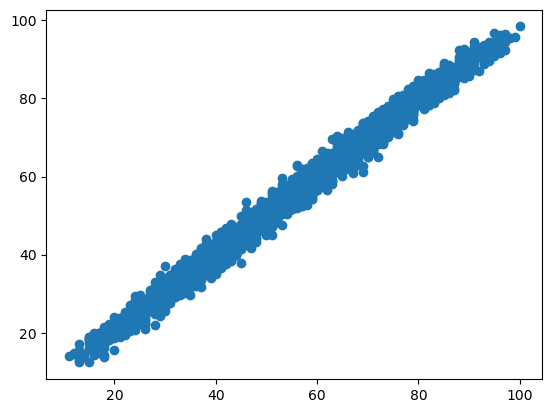

In [37]:
plt.scatter(y_test, predict)
plt.show()

In [38]:
mean_absolute_error(y_test, predict)

1.6383999999999999

In [39]:
r2_score(y_test, predict)

0.9885958192506877

In [40]:
model.coef_

array([2.85861593, 1.0167751 , 0.64615337, 0.48207393, 0.19402312])

In [41]:
model.intercept_

-34.000769143853496